In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"D:/DATA SCIENCE/TASKS/Country-data.csv")
df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [4]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


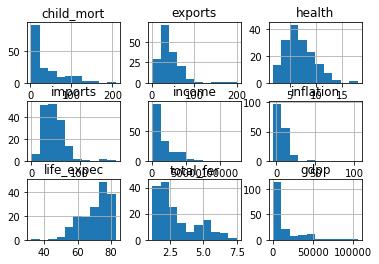

In [8]:
df.hist()
plt.show()

In [9]:
#standard scaling
df1= df.drop(['country'],axis=1)
cols= df1.columns
from sklearn.preprocessing import StandardScaler
st_scale= StandardScaler()
df1=st_scale.fit_transform(df1)

In [10]:
X=pd.DataFrame(df1,columns=[cols])
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [12]:
pip install kneed

In [13]:
#K means clustering
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [14]:
wcss=[]
silhouette_coefficients = []
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=32)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)
    print('WCSS-Cluster',i,'=',kmeans.inertia_)

WCSS-Cluster 2 = 1050.2145582853307
WCSS-Cluster 3 = 831.424435208687
WCSS-Cluster 4 = 700.52053697222
WCSS-Cluster 5 = 620.3621532663785
WCSS-Cluster 6 = 565.3667466044102
WCSS-Cluster 7 = 495.3233825951917
WCSS-Cluster 8 = 454.4544105812775
WCSS-Cluster 9 = 429.06577637877916
WCSS-Cluster 10 = 398.15560671817906


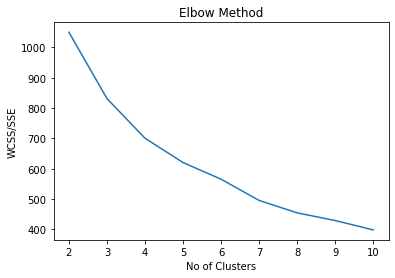

In [15]:
#Elbow method
plt.plot(range(2,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS/SSE')
plt.show()

### AS PER ELBOW METHOD THE NUMBER OF CLUSTERS SHOULD BE 4

In [16]:
knee=KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')
knee.elbow

4

### Number of clusters should be 4 as per knee locator method

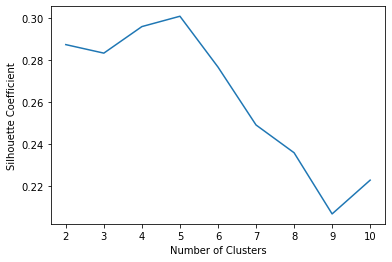

In [17]:
#Validatiing no of clusters using silhouette_coefficient
plt.plot(range(2, 11), silhouette_coefficients)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Silhoute Coefficient is giving cluster no 4 having highest score. so we will chose 4 as no of clusters

In [19]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=32)
y_kmeans=kmeans.fit(X)
cluster=kmeans.labels_
cluster

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 3,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 3, 0, 1, 3, 3, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1])

Kmeans have assigned data points to 4 clusters

In [22]:
#Mapping the clusters to observatios in Data Frame
df['cluster']=kmeans.labels_

In [23]:
df[df['cluster']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0


In [24]:
df[df['cluster']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1


In [25]:
df[df['cluster']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2


In [26]:
df[df['cluster']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,3
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,3
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,3
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,3
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,3
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,3
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,3
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,3


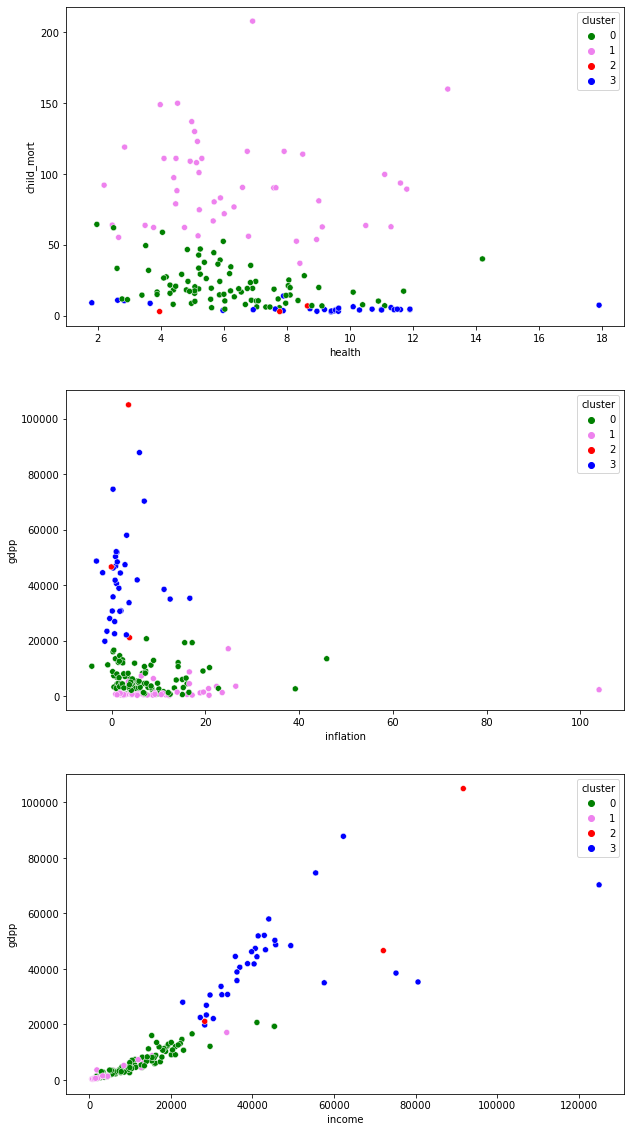

In [27]:
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
sns.scatterplot(x = 'health', y = 'child_mort', data= df, hue = 'cluster',palette=['green','violet','red','blue'])
plt.subplot(3,1,2)
sns.scatterplot(x = 'inflation', y = 'gdpp', data= df, hue = 'cluster',palette=['green','violet','red','blue'])
plt.subplot(3,1,3)
sns.scatterplot(x = 'income', y = 'gdpp', data= df, hue = 'cluster',palette=['green','violet','red','blue'])
plt.show()

### CLUSTER 2 HAS HIGHER CHILD MORTALITY, LOWER INCOME AND POOR GDPvsINFLATION. HENCE HELP INTERNATIONAL SHOULD PRIORITIZE CLUSTER 2 COUNTRIES